In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import accuracy_score


### Reading and preparing the data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Bank Customer Churn Prediction.csv")
warnings.filterwarnings('ignore')

In [ ]:
 data.drop(data.columns[[0,2,3]],inplace = True,axis=1)
 
 y = data["churn"]
 data.drop("churn",inplace = True, axis = 1)


In [ ]:
y = y.astype(float)
y.dtype

dtype('float64')

In [ ]:
data = data.astype(float)

In [ ]:
x_train,x_test,ytrain,ytest = train_test_split(data,y,test_size=0.1)

ytrain_df = pd.DataFrame(data = ytrain, columns=['churn'])


In [ ]:
x_train.reset_index(drop=True)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,700.0,38.0,9.0,65962.63,1.0,1.0,1.0,100950.48
1,611.0,40.0,8.0,100812.33,2.0,1.0,0.0,147358.27
2,629.0,32.0,3.0,0.00,2.0,1.0,1.0,15404.64
3,706.0,38.0,8.0,0.00,2.0,0.0,1.0,46635.11
4,774.0,26.0,2.0,93844.69,1.0,1.0,0.0,28415.36
...,...,...,...,...,...,...,...,...
8995,581.0,39.0,1.0,121523.51,1.0,0.0,0.0,161655.55
8996,595.0,41.0,9.0,150463.11,2.0,0.0,1.0,81548.38
8997,850.0,38.0,5.0,0.00,2.0,1.0,0.0,16491.64
8998,684.0,56.0,3.0,127585.98,3.0,1.0,1.0,80593.49


In [ ]:
x_train = np.array(x_train)
x_test=np.array(x_test)
ytrain=np.array(ytrain)
ytest = np.array(ytest)

### Normalizing the data





In [ ]:
for n in range(len(x_train[0])):
  x_train[:,n] = x_train[:,n] - np.min(x_train[:,n])
for n in range(len(x_train[0])):
  x_train[:,n] = x_train[:,n] / np.max(x_train[:,n])

In [ ]:
x_train

array([[0.7       , 0.27027027, 0.9       , ..., 1.        , 1.        ,
        0.5047427 ],
       [0.522     , 0.2972973 , 0.8       , ..., 1.        , 0.        ,
        0.73680381],
       [0.558     , 0.18918919, 0.3       , ..., 1.        , 1.        ,
        0.07697265],
       ...,
       [1.        , 0.27027027, 0.5       , ..., 1.        , 0.        ,
        0.08240817],
       [0.668     , 0.51351351, 0.3       , ..., 1.        , 1.        ,
        0.40294803],
       [0.564     , 0.40540541, 0.6       , ..., 1.        , 0.        ,
        0.32170087]])

### Function definitions

In [ ]:
def a_function(x):
  return 1/(1+np.exp(-x))
def square_loss(y_pred, target):
  return np.mean(pow((y_pred - target),2))
#definiton of the activation and square loss functions.

### Logistic Regression

In [ ]:
lr = 0.001 #learning rate
W=np.zeros(8,dtype=float)
losslog=np.zeros(10000,dtype=float)
#W = pd.DataFrame(data=w_init,columns=['Weights'])
b = 0.0
for i in range(10000):
 z = np.dot(x_train,W) + b
 y_pred = a_function(z)
 loss = square_loss(y_pred,ytrain)
 losslog[i]=loss
 gradient_W = np.dot((y_pred- ytrain).T, x_train)/x_train.shape[0]
 gradient_b = np.mean(y_pred-ytrain)
 W = W - lr * gradient_W
 b = b - lr* gradient_b


### Loss vs epochs for the training data

Text(0, 0.5, 'Loss')

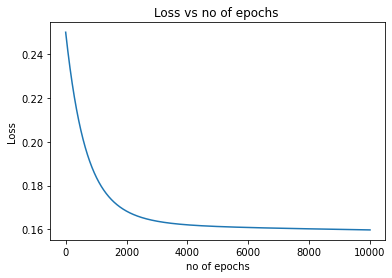

In [ ]:
plt.plot(range(10000),losslog)
plt.title("Loss vs no of epochs ")
plt.xlabel("no of epochs")
plt.ylabel("Loss")